# Imports

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime as dt
import scipy.stats

#%matplotlib inline
%matplotlib widget
#%matplotlib qt

# manipulowanie danymi

In [2]:
A=pd.DataFrame({'data':np.arange(dt.datetime(2020,3,1),dt.datetime(2020,3,6),dt.timedelta(days=1)),
                'A':np.random.randn(5),
               'B':np.random.randn(5),
               'C':np.random.randn(5),
               })
A.set_index(['data'],inplace=True)
print(A)

                   A         B         C
data                                    
2020-03-01 -1.256189 -0.610925  0.818966
2020-03-02  0.451656  0.982334  0.349507
2020-03-03  0.853983 -0.042610 -1.818316
2020-03-04  1.938947  0.355621 -0.060456
2020-03-05  0.936029 -1.929623 -0.181322


# generowanie

In [3]:
A=pd.DataFrame(data=np.random.randint(-10,11,size=(20,3)),
               index=np.arange(1,21),
               columns=['A','B','C']
               )
A.index.name='id'
print(A.iloc[:3])
print(A.iloc[-3:])
print(A.index)
print(A.columns)

print(A.iloc[:,:])

print(A.sample(5,axis=0))
print(A['A'])
print(A.iloc[:3,:][['A','B']])
print(A.iloc[5,:])
print(A.iloc[[0,5,6,7],[1,2]])

#describe
print(A.describe())
print(A[A>0])
print(A.mean())
print(A.mean(axis=1))

    A   B  C
id          
1  -8 -10 -3
2   1  -5  4
3   8  -9 -7
     A   B  C
id           
18   0 -10 -3
19 -10   6  8
20  -4 -10 -2
Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
            20],
           dtype='int64', name='id')
Index(['A', 'B', 'C'], dtype='object')
     A   B   C
id            
1   -8 -10  -3
2    1  -5   4
3    8  -9  -7
4    6   0  -4
5    8   3  -1
6   -2   6   8
7   -7   7   2
8    4  -2  -8
9   -4   5  -4
10  -5   8  10
11  -4   0  -2
12   9 -10  -6
13   9  -5   9
14  -8  -7   6
15   3  -5   8
16   2  -4  -8
17   7  -1  -6
18   0 -10  -3
19 -10   6   8
20  -4 -10  -2
    A   B   C
id           
10 -5   8  10
20 -4 -10  -2
12  9 -10  -6
1  -8 -10  -3
15  3  -5   8
id
1     -8
2      1
3      8
4      6
5      8
6     -2
7     -7
8      4
9     -4
10    -5
11    -4
12     9
13     9
14    -8
15     3
16     2
17     7
18     0
19   -10
20    -4
Name: A, dtype: int32
    A   B
id       
1  -8 -10
2   1  -5
3   8  -9
A   -2
B  

# describe

In [4]:
print(A.describe())
print(A[A>0])
print(A.mean())
print(A.mean(axis=1))

               A         B          C
count  20.000000  20.00000  20.000000
mean    0.250000  -2.15000   0.050000
std     6.315186   6.29348   6.227908
min   -10.000000 -10.00000  -8.000000
25%    -4.250000  -7.50000  -4.500000
50%     0.500000  -3.00000  -2.000000
75%     6.250000   3.50000   6.500000
max     9.000000   8.00000  10.000000
      A    B     C
id                
1   NaN  NaN   NaN
2   1.0  NaN   4.0
3   8.0  NaN   NaN
4   6.0  NaN   NaN
5   8.0  3.0   NaN
6   NaN  6.0   8.0
7   NaN  7.0   2.0
8   4.0  NaN   NaN
9   NaN  5.0   NaN
10  NaN  8.0  10.0
11  NaN  NaN   NaN
12  9.0  NaN   NaN
13  9.0  NaN   9.0
14  NaN  NaN   6.0
15  3.0  NaN   8.0
16  2.0  NaN   NaN
17  7.0  NaN   NaN
18  NaN  NaN   NaN
19  NaN  6.0   8.0
20  NaN  NaN   NaN
A    0.25
B   -2.15
C    0.05
dtype: float64
id
1    -7.000000
2     0.000000
3    -2.666667
4     0.666667
5     3.333333
6     4.000000
7     0.666667
8    -2.000000
9    -1.000000
10    4.333333
11   -2.000000
12   -2.333333
13    4.3333

# concat

In [5]:
A=pd.DataFrame(data=np.random.randint(-10,11,size=(5,2)),
               columns=['A','B']
               )
B=pd.DataFrame(data=np.random.randint(-10,11,size=(5,1)),
               columns=['C']
               )
C=np.concatenate([A,B],axis=1)
print(C.T)

[[-8 -1 -8 -5  1]
 [ 4 -8  4  2  5]
 [ 4 -7  1 -9  2]]


# sortowanie

In [6]:
df = pd.DataFrame({"x": [1, 2, 3, 4, 5], 
                   "y": ["a", "b", "a", "b", "b"]},
                  index=np.arange(5))
df.index.name='id'
df.sort_index(inplace=True)
print(df)
df.sort_values(['y'],ascending=False,inplace=True)
print(df)

    x  y
id      
0   1  a
1   2  b
2   3  a
3   4  b
4   5  b
    x  y
id      
1   2  b
3   4  b
4   5  b
0   1  a
2   3  a


# grupowanie

In [7]:
slownik = {'Day': ['Mon', 'Tue', 'Mon', 'Tue', 'Mon'],
            'Fruit': ['Apple','Apple', 'Banana', 'Banana', 'Apple'], 
            'Pound': [10, 15, 50, 40, 5],
            'Profit':[20, 30, 25, 20, 10]
}
df3 = pd.DataFrame(slownik)
print(df3)
print(df3.groupby('Day').sum())
print(df3.groupby(['Day','Fruit']).sum())

   Day   Fruit  Pound  Profit
0  Mon   Apple     10      20
1  Tue   Apple     15      30
2  Mon  Banana     50      25
3  Tue  Banana     40      20
4  Mon   Apple      5      10
     Pound  Profit
Day               
Mon     65      55
Tue     55      50
            Pound  Profit
Day Fruit                
Mon Apple      15      30
    Banana     50      25
Tue Apple      15      30
    Banana     40      20


# wypelnianie

In [8]:
df=pd.DataFrame(np.random.randn(20, 3), index=np.arange(20), columns=['A','B','C'])
df.index.name='id'
print(df)
df['B']=1
print(df)
df.iloc[1,2]=20
df[df<0]=-df
print(df)

           A         B         C
id                              
0  -0.891737 -1.517164  0.858944
1  -0.665144  0.681262  0.578818
2  -0.540704 -0.954881  0.500176
3   0.222320 -1.414936 -0.053077
4  -0.265858  0.106428 -2.337713
5   0.307960 -1.032499  0.950561
6  -0.367199  0.126982  0.690765
7   1.782534  0.796155 -1.286099
8   0.397479 -0.103362 -0.171625
9  -1.282475 -0.697375 -0.837869
10  0.184442 -0.367528  1.062475
11 -0.773436 -0.724320 -0.142568
12 -1.252606 -0.063462 -1.245515
13 -0.995621  2.557240 -0.160858
14  0.778445  1.530953 -1.230845
15  1.147183 -0.847918 -1.244663
16 -1.137804  0.739651  1.926660
17  0.539088  1.028321  2.255143
18  0.209068 -0.605397 -1.943028
19  0.953156 -1.061830  0.303398
           A  B         C
id                       
0  -0.891737  1  0.858944
1  -0.665144  1  0.578818
2  -0.540704  1  0.500176
3   0.222320  1 -0.053077
4  -0.265858  1 -2.337713
5   0.307960  1  0.950561
6  -0.367199  1  0.690765
7   1.782534  1 -1.286099
8   0.397479  

# uzupelnianie

In [9]:
df.iloc[[0,3],1]=np.nan
print(df)
df.fillna(0,inplace=True)
print(df)
df.iloc[[0,3],1]=np.nan
df=df.replace(to_replace=np.nan,value=-9999)
print(df)
df.iloc[[0,3],1]=np.nan
print(pd.isnull(df))

           A    B          C
id                          
0   0.891737  NaN   0.858944
1   0.665144  1.0  20.000000
2   0.540704  1.0   0.500176
3   0.222320  NaN   0.053077
4   0.265858  1.0   2.337713
5   0.307960  1.0   0.950561
6   0.367199  1.0   0.690765
7   1.782534  1.0   1.286099
8   0.397479  1.0   0.171625
9   1.282475  1.0   0.837869
10  0.184442  1.0   1.062475
11  0.773436  1.0   0.142568
12  1.252606  1.0   1.245515
13  0.995621  1.0   0.160858
14  0.778445  1.0   1.230845
15  1.147183  1.0   1.244663
16  1.137804  1.0   1.926660
17  0.539088  1.0   2.255143
18  0.209068  1.0   1.943028
19  0.953156  1.0   0.303398
           A    B          C
id                          
0   0.891737  0.0   0.858944
1   0.665144  1.0  20.000000
2   0.540704  1.0   0.500176
3   0.222320  0.0   0.053077
4   0.265858  1.0   2.337713
5   0.307960  1.0   0.950561
6   0.367199  1.0   0.690765
7   1.782534  1.0   1.286099
8   0.397479  1.0   0.171625
9   1.282475  1.0   0.837869
10  0.184442  

# Zadania

In [10]:
df = pd.DataFrame({"x": [1, 2, 3, 4, 5], 
                   "y": ["a", "b", "a", "b", "b"]})

<h3> 1. grupować tabele po zmiennej symbolicznej Y , a następnie wyznaczyć średnią wartość </h3>

In [11]:
print(df.groupby('y').mean(),'\n')

          x
y          
a  2.000000
b  3.666667 



<h3>2. Wyznaczyć rozkład liczności atrybutów (value counts).</h3>

In [12]:
print(pd.DataFrame({col : df[col].value_counts() for col in df.columns}))
print(df.value_counts())

     x    y
1  1.0  NaN
2  1.0  NaN
3  1.0  NaN
4  1.0  NaN
5  1.0  NaN
a  NaN  2.0
b  NaN  3.0
x  y
1  a    1
2  b    1
3  a    1
4  b    1
5  b    1
dtype: int64


<h3>3. Wczytać dane autos.csv, za pomocą polecenia np.loadtxt oraz pandas.read csv. Sprawdź różnice</h3>

In [13]:
#df=np.loadtxt("./lab2/autos.csv")
#print(df)
df=pd.read_csv("./autos.csv")
print(df.head())

   Unnamed: 0  normalized-losses         make fuel-type aspiration  \
0           0                NaN  alfa-romero       gas        std   
1           1                NaN  alfa-romero       gas        std   
2           2                NaN  alfa-romero       gas        std   
3           3              164.0         audi       gas        std   
4           4              164.0         audi       gas        std   

  num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0          two  convertible          rwd           front        88.6  ...   
1          two  convertible          rwd           front        88.6  ...   
2          two    hatchback          rwd           front        94.5  ...   
3         four        sedan          fwd           front        99.8  ...   
4         four        sedan          4wd           front        99.4  ...   

   fuel-system  bore  stroke  compression-ratio horsepower peak-rpm  city-mpg  \
0         mpfi  3.47    2.68       

<h3>4. grupować ramkę danych po zmiennej ’make’ a następnie wyznaczyć średnie zużycie paliwa dla każdego z producentów.</h3>

In [14]:
print(df.groupby('make').mean()[['highway-mpg','city-mpg']].sort_values(['highway-mpg','city-mpg']))

               highway-mpg   city-mpg
make                                 
jaguar           18.333333  14.333333
mercedes-benz    21.000000  18.500000
mercury          24.000000  19.000000
audi             24.142857  18.857143
bmw              25.375000  19.375000
volvo            25.818182  21.181818
porsche          26.000000  17.400000
peugot           26.636364  22.454545
alfa-romero      26.666667  20.333333
saa              27.333333  20.333333
subaru           30.750000  26.333333
renault          31.000000  23.000000
mitsubishi       31.153846  24.923077
mazda            31.941176  25.705882
toyota           32.906250  27.500000
nissan           32.944444  27.000000
dodge            34.111111  28.000000
plymouth         34.142857  28.142857
volkswagen       34.916667  28.583333
honda            35.461538  30.384615
isuzu            36.000000  31.000000
chevrolet        46.333333  41.000000


<h3>5. Zgrupować ramkę danych po zmiennej make liczności dla atrybutu fuel-type.</h3>

In [15]:
print(df.groupby('make')['fuel-type'].value_counts().sort_values(ascending=False))

make           fuel-type
toyota         gas          29
nissan         gas          17
mazda          gas          15
honda          gas          13
mitsubishi     gas          13
subaru         gas          12
volvo          gas          10
dodge          gas           9
volkswagen     gas           8
bmw            gas           8
audi           gas           7
plymouth       gas           7
saa            gas           6
peugot         gas           6
               diesel        5
porsche        gas           5
isuzu          gas           4
volkswagen     diesel        4
mercedes-benz  gas           4
               diesel        4
toyota         diesel        3
alfa-romero    gas           3
jaguar         gas           3
chevrolet      gas           3
renault        gas           2
mazda          diesel        2
nissan         diesel        1
mercury        gas           1
volvo          diesel        1
Name: fuel-type, dtype: int64


<h3>6. Dopasować wielomian 1 i 2 stopnia prognozujący wartość zmiennej city-mpg, względem length (np.polyfit ,np.polyval).</h3>

In [16]:
p1=np.polyfit(df['length'],df['city-mpg'],deg=1)
p2=np.polyfit(df['length'],df['city-mpg'],deg=2)

### 7. Wyznaczyć współczynnik korelacji pomiędzy zmiennymi (scipy.stats).

In [17]:
corr=scipy.stats.pearsonr(df['length'],df['city-mpg'])
print("Pearson correlation coefficient:",corr)

Pearson correlation coefficient: (-0.6709086615585712, 3.5955288422259193e-28)


<h3>8. Zwizualizować wynik zaznaczając próbki oraz dopasowanie krzywą na tle próbek.</h3>

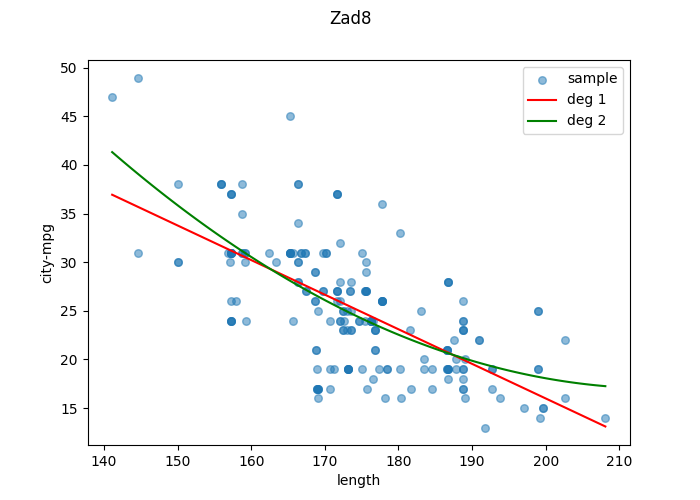

In [18]:
x=np.linspace(df['length'].min(),df['length'].max(),100)
fig,axs=plt.subplots(1,1,figsize=(7,5))
fig.suptitle('Zad8')

axs.scatter(df['length'],df['city-mpg'],s=30,alpha=0.5,label='sample')
axs.set_xlabel('length')
axs.set_ylabel('city-mpg')
#p1[0]*x+p1[1]
axs.plot(x,np.polyval(p1,x),label='deg 1',color='r')
#p2[0]*x**2+p2[1]*x+p2[2]
axs.plot(x,np.polyval(p2,x),label='deg 2',color='g')
axs.legend()
plt.show()

<h3>9. Dla zmiennej length utworzyć jednowymiarowy estymator funkcji
gęstości
Użyj:
scipy.stats.gaussian kde , proszę zwizualizować wynik przedstawiając jednocześnie próbki i funkcję gęstości. Do wykresu dodać
legendę.
Użyj: (plot(..., label=’...’), legend)</h3>

<h3>10. Utworzyć w jednym oknie graficznym dwa wykresy ax=subplot(...),
ax.plot(...). Na drugim wykresie przedstawić analogicznie rozkład
dla zmiennej ’width’.</h3>


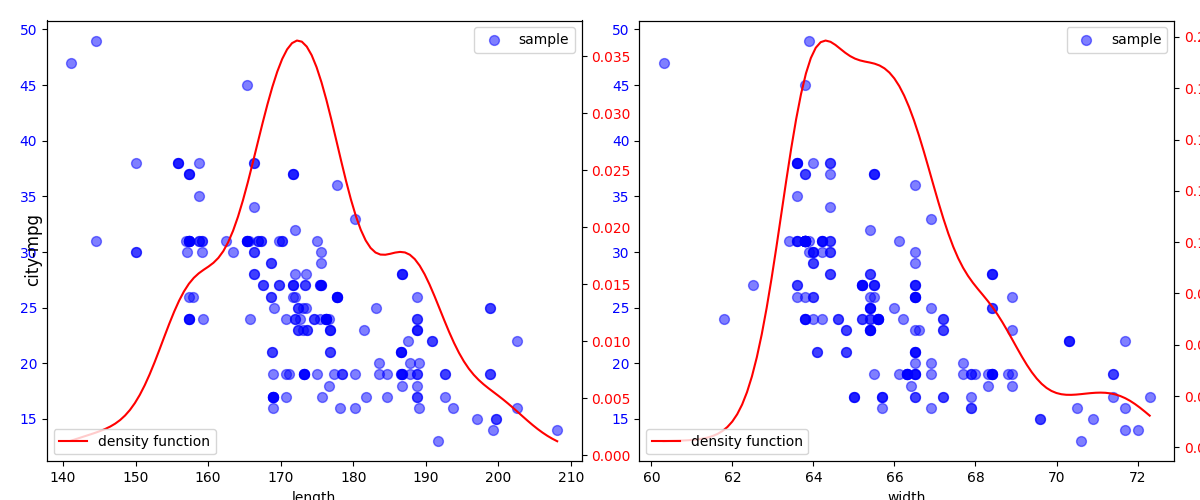

In [19]:
fig2,axs2=plt.subplots(1,2,figsize=(12,5))
fig2.tight_layout()
fig2.supylabel('city-mpg')
axs2_twin=axs2[0].twinx()
axs2[0].set_xlabel('length')

axs2[0].tick_params(axis='y', labelcolor='b')
axs2_twin.tick_params(axis='y', labelcolor='r')

axs2[0].scatter(df['length'],df['city-mpg'],s=50,alpha=0.5,label='sample',color='b')
kernel=scipy.stats.gaussian_kde(df['length'])
axs2_twin.plot(x,kernel(x),label='density function',color='r')

axs2[0].legend()
axs2_twin.legend(loc = 'lower left')

#10

x2=np.linspace(df['width'].min(),df['width'].max(),100)
axs2_twin2=axs2[1].twinx()
axs2[1].set_xlabel('width')

axs2[1].tick_params(axis='y', labelcolor='b')
axs2_twin2.tick_params(axis='y', labelcolor='r')

axs2[1].scatter(df['width'],df['city-mpg'],s=50,alpha=0.5,label='sample',color='b')
kernel2=scipy.stats.gaussian_kde(df['width'])
axs2_twin2.plot(x2,kernel2(x2),label='density function',color='r')

axs2[1].legend()
axs2_twin2.legend(loc = 'lower left')
plt.show()

<h3>11. Utworzyć dwuwymiarowy estymator funkcji gęstości dla zmiennych width i length , wynik przedstawić graficznie w nowym oknie
rysując próbki poleceniem plot oraz funkcję gęstości używając polecenia meshgrid i contour.
Wynik zapisać do plików w formacie png i pdf (savefig)</h3>

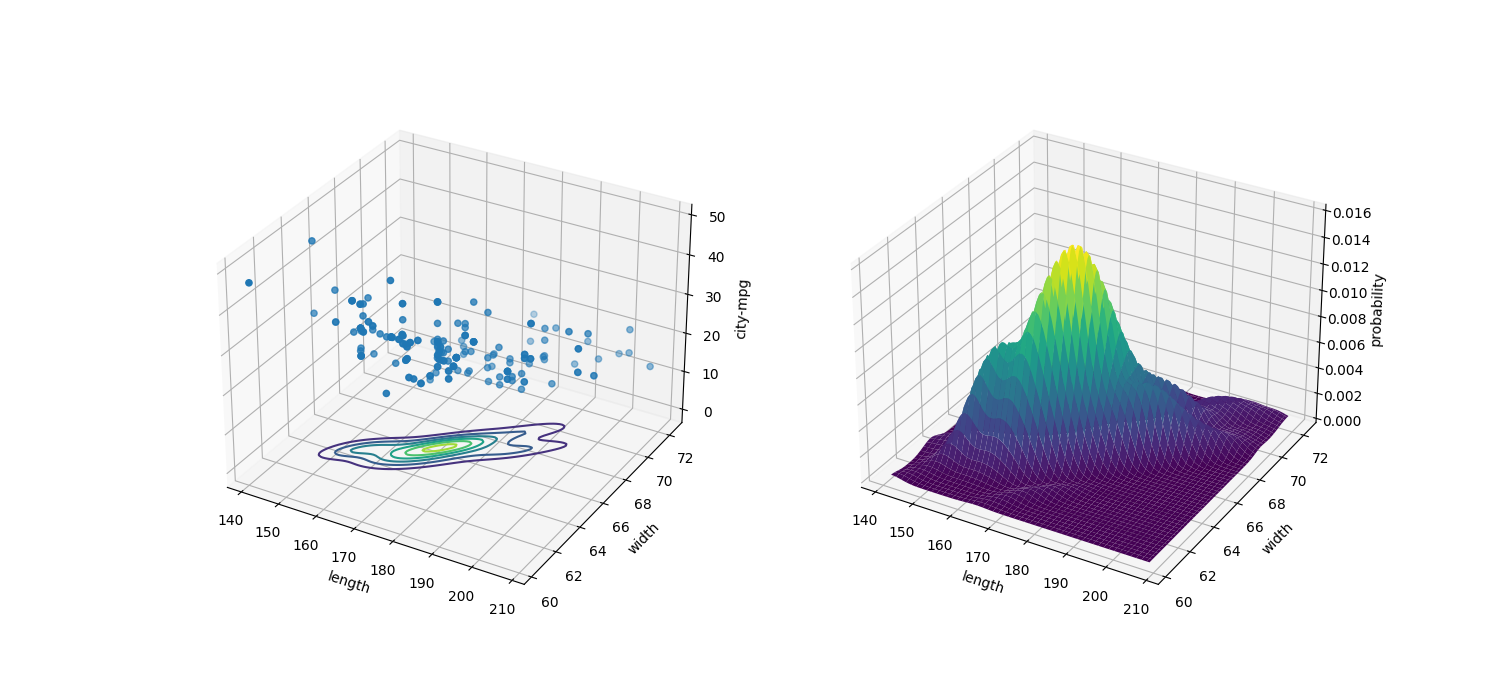

In [20]:
from mpl_toolkits import mplot3d

fig3 = plt.figure(figsize=(15,7))
fig3.tight_layout()
ax3 = fig3.add_subplot(1, 2, 1,projection='3d')
ax3_2 = fig3.add_subplot(1, 2, 2,projection='3d')

ax3.set_xlabel('length')
ax3.set_ylabel('width')
ax3.set_zlabel('city-mpg')

ax3_2.set_xlabel('length')
ax3_2.set_ylabel('width')
ax3_2.set_zlabel('probability')

X,Y=np.meshgrid(x,x2)
positions = np.vstack([X.ravel(), Y.ravel()])
values=np.vstack([df['length'], df['width']])
kernel3=scipy.stats.gaussian_kde(values)

Z=kernel3(positions)
Z=np.reshape(Z,X.shape)

ax3.scatter3D(df['length'], df['width'], df['city-mpg'])
ax3.contour(X,Y,Z,cmap='viridis')

ax3_2.plot_surface(X,Y,Z,cmap='viridis')

plt.show()